## Imports

In [16]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def plot_results(epochs, history, metric='accuracy'):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(epochs), y=history.history['loss'], label='train_loss')
    sns.lineplot(x=range(epochs), y=history.history['val_loss'], label='val_loss')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(epochs), y=history.history[metric], label=f'Train {metric}')
    sns.lineplot(x=range(epochs), y=history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.show()

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Daten einlesen

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [14]:
X_train_full.shape

(60000, 28, 28)

In [6]:
y_train_full.shape

(60000,)

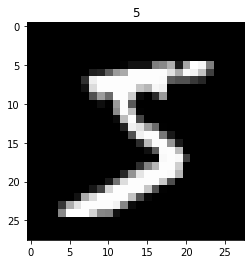

In [7]:
plt.imshow(X_train_full[0], cmap='gray')
plt.title(label=y_train_full[0])
plt.show()

## Train-/Test split & Normalisierung

In [8]:
X_valid, X_train = X_train_full[:5000]/ 255.0, X_train_full[5000:] / 255.0 #Aufteilung in train und validation set und Normalisierung (0-1) von typ float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test  = X_test/ 255.0

#Durch 255 Teilen um Farbwerte zwischen 0-1 zu skalieren

## Modellierung - CNN bauen

In [19]:
model = keras.models.Sequential([
    keras.Input(shape=[28,28,1]),
    keras.layers.Conv2D(64, 7, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2), #each spatial dimension will be divided by factor 2
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128,3,activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3,activation="relu", padding="same"), #common practice to double the number of filters after each pooling layer
    keras.layers.Conv2D(256,3,activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(), #dense layer expects 1D array but Conv-layers have 2D array
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5), #reducing overfitting
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 256)        

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd",metrics=["accuracy"])

In [22]:
X_train = X_train.reshape((-1,28,28,1))
X_valid = X_valid.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

In [23]:
EPOCHS = 20
BATCHSIZE = 32

In [24]:
history = model.fit(X_train,y_train, batch_size=BATCHSIZE, epochs=EPOCHS, validation_data = (X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 12s 7ms/step - loss: 1.2100 - accuracy: 0.5870 - val_loss: 0.1434 - val_accuracy: 0.9604
Epoch 2/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2756 - accuracy: 0.9210 - val_loss: 0.0790 - val_accuracy: 0.9770
Epoch 3/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1719 - accuracy: 0.9531 - val_loss: 0.0694 - val_accuracy: 0.9820
Epoch 4/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1327 - accuracy: 0.9654 - val_loss: 0.0570 - val_accuracy: 0.9862
Epoch 5/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1098 - accuracy: 0.9713 - val_loss: 0.0520 - val_accuracy: 0.9864
Epoch 6/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0958 - accuracy: 0.9755 - val_loss: 0.0534 - val_accuracy: 0.9864
Epoch 7/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0819 - accuracy: 0.9792 - val_loss: 0.0433 - val_ac

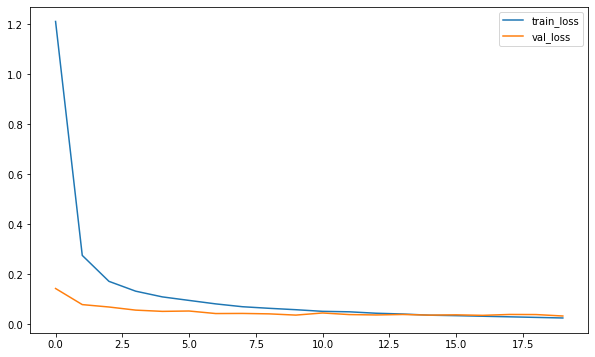

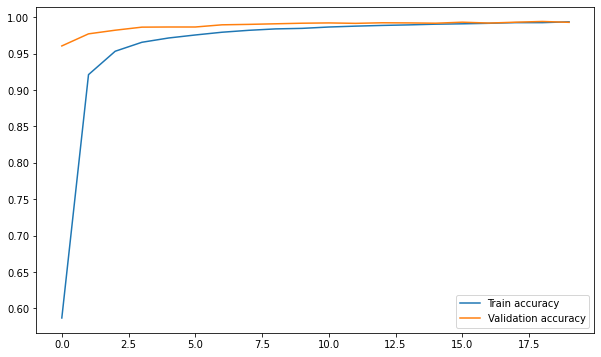

In [26]:
plot_results(EPOCHS, history)